<a href="https://colab.research.google.com/github/Husain-Vora/Deep-Learning-and-Machine-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
#additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print('x_train.shape:', x_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
#data is only 2D
#convolution expects height * width * color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
#number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [ ]:
#Build the model using functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
#Complile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['Accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - Accuracy: 0.7463 - loss: 0.6920 - val_Accuracy: 0.8517 - val_loss: 0.3919
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - Accuracy: 0.8626 - loss: 0.3686 - val_Accuracy: 0.8716 - val_loss: 0.3440
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - Accuracy: 0.8821 - loss: 0.3103 - val_Accuracy: 0.8734 - val_loss: 0.3335
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - Accuracy: 0.8963 - loss: 0.2726 - val_Accuracy: 0.8885 - val_loss: 0.3049
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - Accuracy: 0.9069 - loss: 0.2485 - val_Accuracy: 0.8983 - val_loss: 0.2894
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - Accuracy: 0.9160 - loss: 0.2226 - val_Accuracy: 0.8925 - val_loss: 0.2946
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - Accuracy: 0.9235 - loss: 0.2012 - val_Accuracy: 0.8937 - val_loss: 0.2953
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - Accuracy: 0.9261 -

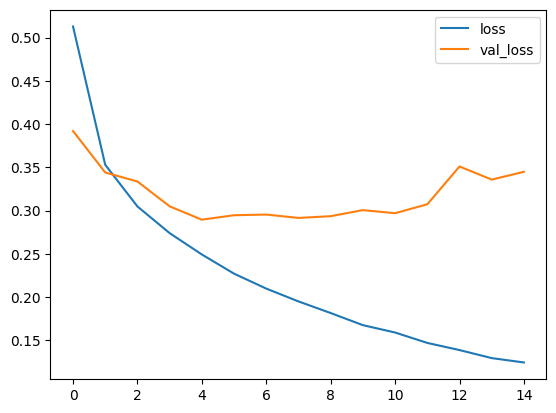

In [ ]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

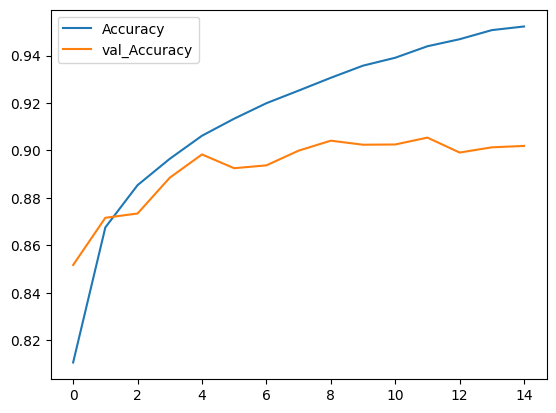

In [ ]:
#plot accuracy per iteration
plt.plot(r.history['Accuracy'], label='Accuracy')
plt.plot(r.history['val_Accuracy'], label='val_Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Confusion matrix, without normalization
[[865   2  26  23   2   2  76   0   4   0]
 [  2 981   0  14   1   0   2   0   0   0]
 [ 15   0 869   8  32   0  76   0   0   0]
 [ 16   3  19 916  16   0  29   0   1   0]
 [  0   2  88  30 794   1  85   0   0   0]
 [  0   0   0   1   0 985   0  12   0   2]
 [ 98   0  70  26  76   0 722   0   8   0]
 [  0   0   0   0   0  14   0 957   0  29]
 [  3   0   5   4   2   1  16   4 964   1]
 [  1   0   0   0   0   5   0  28   0 966]]


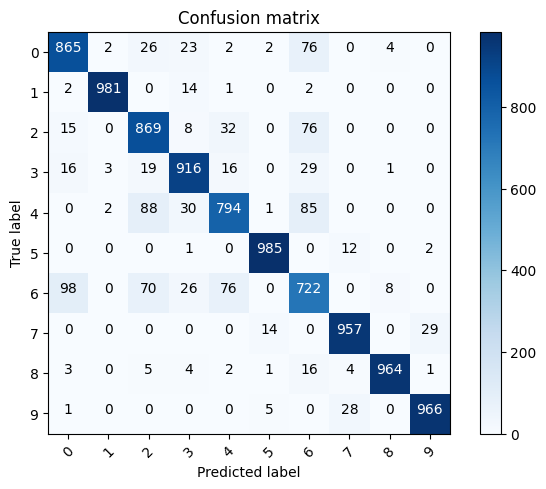

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
#labels
labels='''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Text(0.5, 1.0, 'True label: Coat Predicted: Shirt')

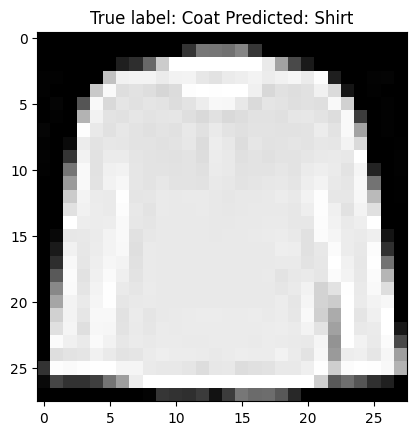

In [ ]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))